Base KNN Accuracy: 0.8248587570621468
Classification Report (Base):
               precision    recall  f1-score   support

           0       0.88      0.96      0.91       405
           1       0.73      0.72      0.73       285
           2       0.85      0.70      0.77       195

    accuracy                           0.82       885
   macro avg       0.82      0.79      0.80       885
weighted avg       0.82      0.82      0.82       885



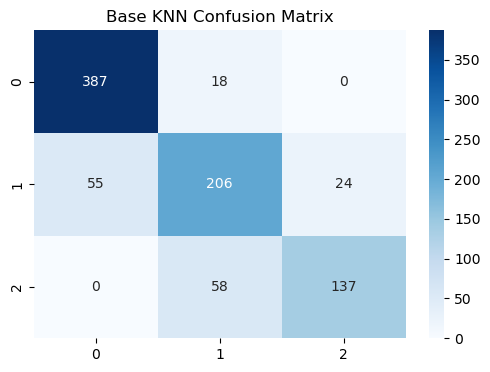


KNN (n_neighbors=10) Accuracy: 0.8361581920903954
Classification Report (n_neighbors):
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       405
           1       0.74      0.76      0.75       285
           2       0.91      0.67      0.77       195

    accuracy                           0.84       885
   macro avg       0.84      0.80      0.81       885
weighted avg       0.84      0.84      0.83       885



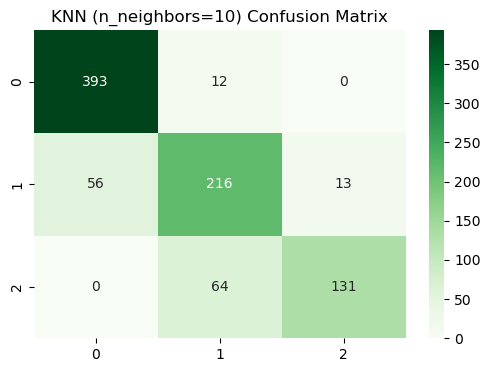


KNN (n_neighbors=10 + weights='distance') Accuracy: 0.8418079096045198
Classification Report (Tuned):
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       405
           1       0.75      0.76      0.76       285
           2       0.88      0.71      0.78       195

    accuracy                           0.84       885
   macro avg       0.84      0.81      0.82       885
weighted avg       0.84      0.84      0.84       885



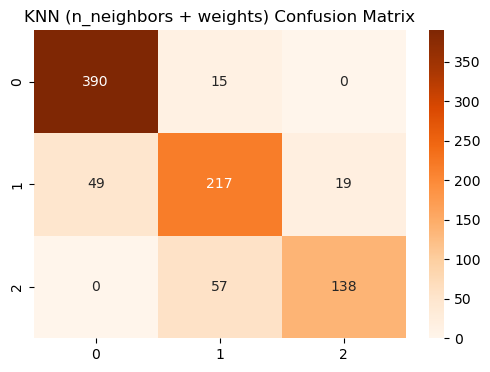

In [1]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


#Load dataset

data = pd.read_csv("Preprocessing_Pollution_Dataset111.csv")

features = ["Temperature", "Humidity", "PM2.5", "PM10", "NO2", "SO2", "CO", "Population_Density"]
target = "AirQuality_encoded"

X = data[features]
y = data[target]

#Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Base KNN

base_knn = KNeighborsClassifier()  # default: n_neighbors=5, weights='uniform'
base_knn.fit(X_train, y_train)
y_pred_base = base_knn.predict(X_test)

acc_base = accuracy_score(y_test, y_pred_base)
print("Base KNN Accuracy:", acc_base)
print("Classification Report (Base):\n", classification_report(y_test, y_pred_base))

cm_base = confusion_matrix(y_test, y_pred_base)
plt.figure(figsize=(6,4))
sns.heatmap(cm_base, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("Base KNN Confusion Matrix")
plt.show()


#KNN with n_neighbors tuning

knn_neighbors = KNeighborsClassifier(n_neighbors=10)  # Example: 10 neighbors
knn_neighbors.fit(X_train, y_train)
y_pred_neighbors = knn_neighbors.predict(X_test)

acc_neighbors = accuracy_score(y_test, y_pred_neighbors)
print("\nKNN (n_neighbors=10) Accuracy:", acc_neighbors)
print("Classification Report (n_neighbors):\n", classification_report(y_test, y_pred_neighbors))

cm_neighbors = confusion_matrix(y_test, y_pred_neighbors)
plt.figure(figsize=(6,4))
sns.heatmap(cm_neighbors, annot=True, fmt='d', cmap='Greens',
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("KNN (n_neighbors=10) Confusion Matrix")
plt.show()


#KNN with n_neighbors + weights tuning

knn_tuned = KNeighborsClassifier(n_neighbors=10, weights='distance')  # weight closer points more
knn_tuned.fit(X_train, y_train)
y_pred_tuned = knn_tuned.predict(X_test)

acc_tuned = accuracy_score(y_test, y_pred_tuned)
print("\nKNN (n_neighbors=10 + weights='distance') Accuracy:", acc_tuned)
print("Classification Report (Tuned):\n", classification_report(y_test, y_pred_tuned))

cm_tuned = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(6,4))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Oranges',
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("KNN (n_neighbors + weights) Confusion Matrix")
plt.show()




In [3]:
#Cross-Validation for all three variations

kf = KFold(n_splits=5, shuffle=True, random_state=42)

#Base KNN CV
cv_base = cross_val_score(base_knn, X, y, cv=kf, scoring='accuracy', n_jobs=-1)
print("Base KNN CV Accuracy Scores:", cv_base)
print(f"Mean CV Accuracy (Base): {cv_base.mean():.4f}")
print(f"Std Dev (Base): {cv_base.std():.4f}\n")

#n_neighbors tuned KNN CV
cv_neighbors = cross_val_score(knn_neighbors, X, y, cv=kf, scoring='accuracy', n_jobs=-1)
print("n_neighbors KNN CV Accuracy Scores:", cv_neighbors)
print(f"Mean CV Accuracy (n_neighbors): {cv_neighbors.mean():.4f}")
print(f"Std Dev (n_neighbors): {cv_neighbors.std():.4f}\n")

#n_neighbors + weights tuned KNN CV
cv_tuned = cross_val_score(knn_tuned, X, y, cv=kf, scoring='accuracy', n_jobs=-1)
print("n_neighbors + weights KNN CV Accuracy Scores:", cv_tuned)
print(f"Mean CV Accuracy (Tuned): {cv_tuned.mean():.4f}")
print(f"Std Dev (Tuned): {cv_tuned.std():.4f}")


Base KNN CV Accuracy Scores: [0.82485876 0.8519774  0.82126697 0.85180995 0.85520362]
Mean CV Accuracy (Base): 0.8410
Std Dev (Base): 0.0148

n_neighbors KNN CV Accuracy Scores: [0.83615819 0.82824859 0.82239819 0.85180995 0.84049774]
Mean CV Accuracy (n_neighbors): 0.8358
Std Dev (n_neighbors): 0.0102

n_neighbors + weights KNN CV Accuracy Scores: [0.84180791 0.85536723 0.8438914  0.86085973 0.85746606]
Mean CV Accuracy (Tuned): 0.8519
Std Dev (Tuned): 0.0076
